<a href="https://colab.research.google.com/github/rickyException/Principles-of-ML/blob/main/1080_ML_A8_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Convert X and y to pandas DataFrames
X_df = pd.DataFrame(data=X, columns=breast_cancer_wisconsin_diagnostic.feature_names)
y_df = pd.DataFrame(data=y, columns=["Diagnosis"])

# Display the first few rows of X_df and y_df
print("Features DataFrame (X):")
print(X_df.head())
print("\nTarget DataFrame (y):")
print(y_df.head())

Features DataFrame (X):
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \


<Axes: >

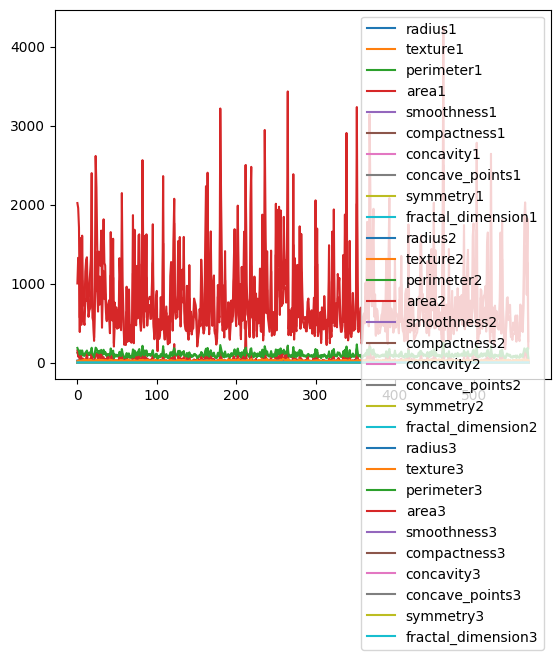

In [6]:
X_df.plot()

In [7]:
print(breast_cancer_wisconsin_diagnostic.feature_names)

None


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_df)

# Create a DataFrame with normalized features
X_normalized_df = pd.DataFrame(data=X_normalized, columns=breast_cancer_wisconsin_diagnostic.feature_names)

# Display the first few rows of the normalized DataFrame
print("Normalized DataFrame:")
print(X_normalized_df.head())

Normalized DataFrame:
         0         1         2         3         4         5         6   \
0  0.521037  0.022658  0.545989  0.363733  0.593753  0.792037  0.703140   
1  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768  0.203608   
2  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017  0.462512   
3  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361  0.565604   
4  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893  0.463918   

         7         8         9   ...        20        21        22        23  \
0  0.731113  0.686364  0.605518  ...  0.620776  0.141525  0.668310  0.450698   
1  0.348757  0.379798  0.141323  ...  0.606901  0.303571  0.539818  0.435214   
2  0.635686  0.509596  0.211247  ...  0.556386  0.360075  0.508442  0.374508   
3  0.522863  0.776263  1.000000  ...  0.248310  0.385928  0.241347  0.094008   
4  0.518390  0.378283  0.186816  ...  0.519744  0.123934  0.506948  0.341575   

         24        25        26        27     

In [9]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y_df, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Train AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)

# Evaluate Random Forest classifier
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Evaluate AdaBoost classifier
ada_pred = ada_classifier.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print("\nAdaBoost Accuracy:", ada_accuracy)
print("AdaBoost Classification Report:")
print(classification_report(y_test, ada_pred))


<ipython-input-9-57db3264a19a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Accuracy: 0.9649122807017544
Random Forest Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


AdaBoost Accuracy: 0.9736842105263158
AdaBoost Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



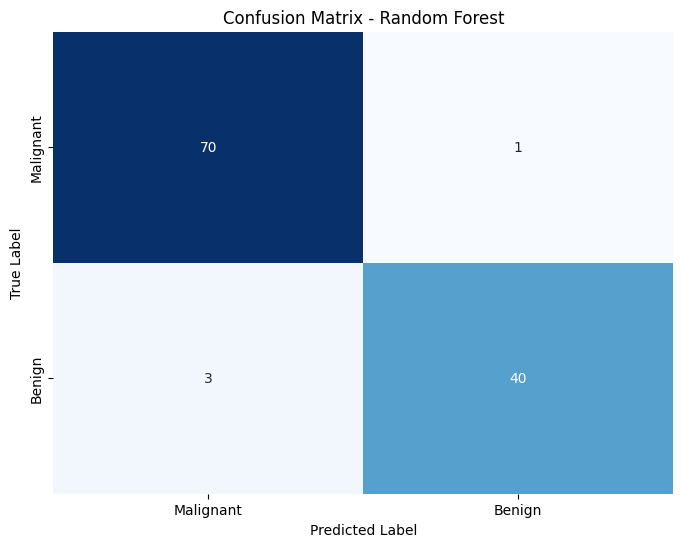

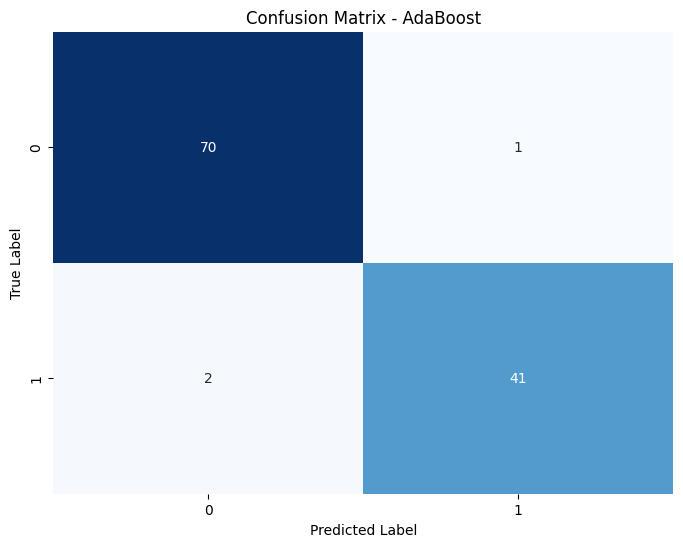

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=["Malignant","Benign"],
            yticklabels=["Malignant","Benign"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Compute confusion matrix for AdaBoost
conf_matrix_ada = confusion_matrix(y_test, ada_pred)

# Plot confusion matrix for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


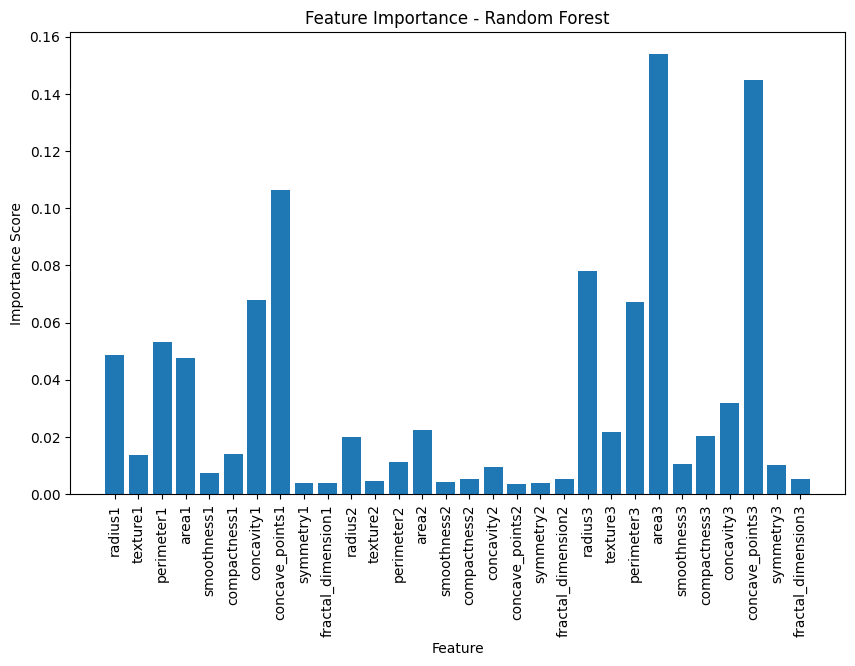

In [11]:
# Extract feature importance from Random Forest classifier
feature_importance_rf = rf_classifier.feature_importances_

features_names=["radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity1","concave_points1","symmetry1","fractal_dimension1","radius2","texture2","perimeter2","area2","smoothness2","compactness2","concavity2","concave_points2","symmetry2","fractal_dimension2","radius3","texture3","perimeter3","area3","smoothness3","compactness3","concavity3","concave_points3","symmetry3","fractal_dimension3" ]

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance_rf, align='center')
plt.xticks(range(X_train.shape[1]), features_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.show()




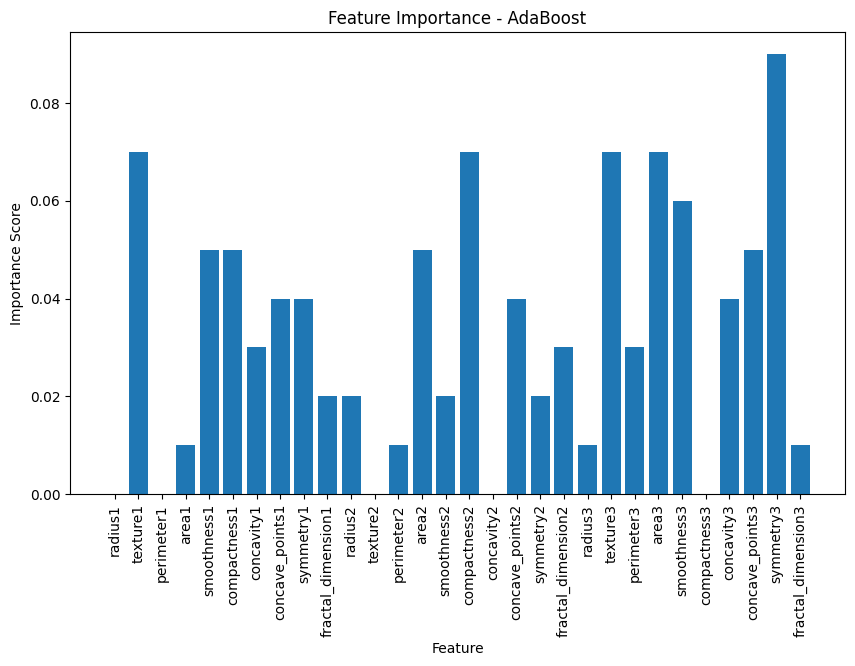

In [12]:
# Extract feature importance from AdaBoost classifier
feature_importance_ada = ada_classifier.feature_importances_

# Plot feature importance for AdaBoost without sorting
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance_ada, align='center')
plt.xticks(range(X_train.shape[1]), features_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - AdaBoost')
plt.show()

